# Zadanie 1 - Berki a Lucny


 
  

### Nacitanie dat

In [1]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

from dataset import notMNIST
from routines import *

data = loadmat("notMNIST_small.mat")
print(data.keys())

images = data["images"]
labels = data["labels"]

print(images.shape)
images = [images[:, :, i] for i in range(0, images.shape[2])]
images = np.asarray(images)
print(images.shape)
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, train_size=0.6, shuffle=True
)

train_dataset = notMNIST(x_train, y_train)
test_dataset = notMNIST(x_test, y_test)

trainloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

dict_keys(['__header__', '__version__', '__globals__', 'images', 'labels'])
(28, 28, 18724)
(18724, 28, 28)


### **Úloha 1**

Porovnajte dosiahnuté výsledky (úspešnosti klasifikácie) pre MLP a CNN sieť. 

Accuracy of the network on the test images: 93.08 %
Accuracy of the network on the test images: 96.62 %


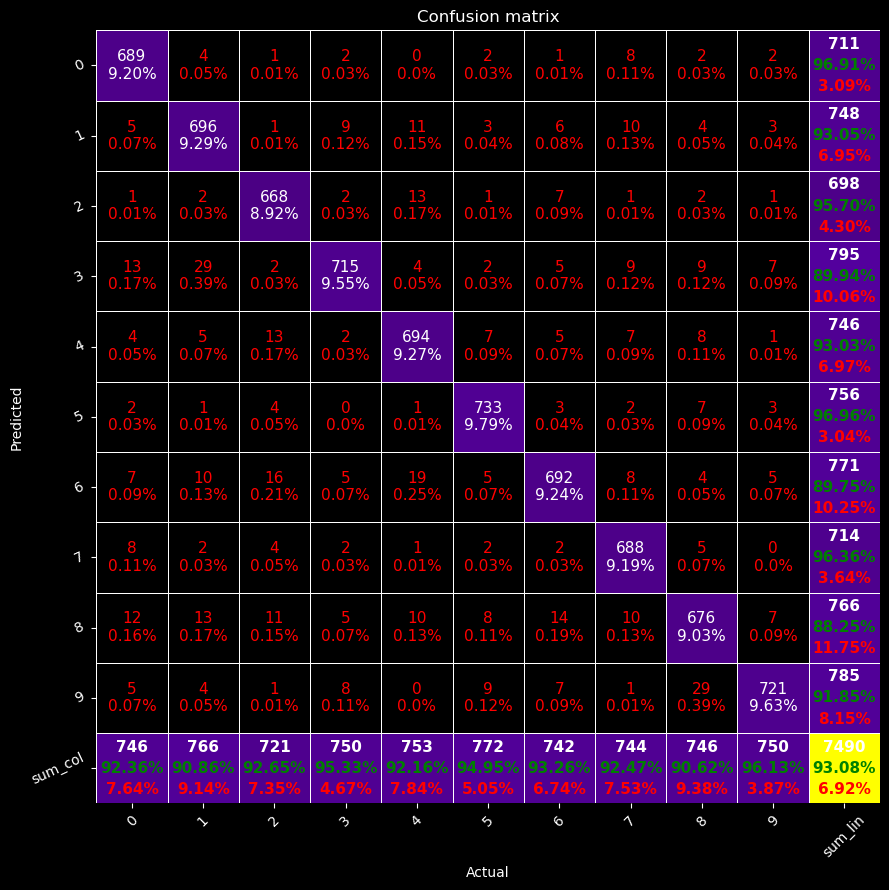

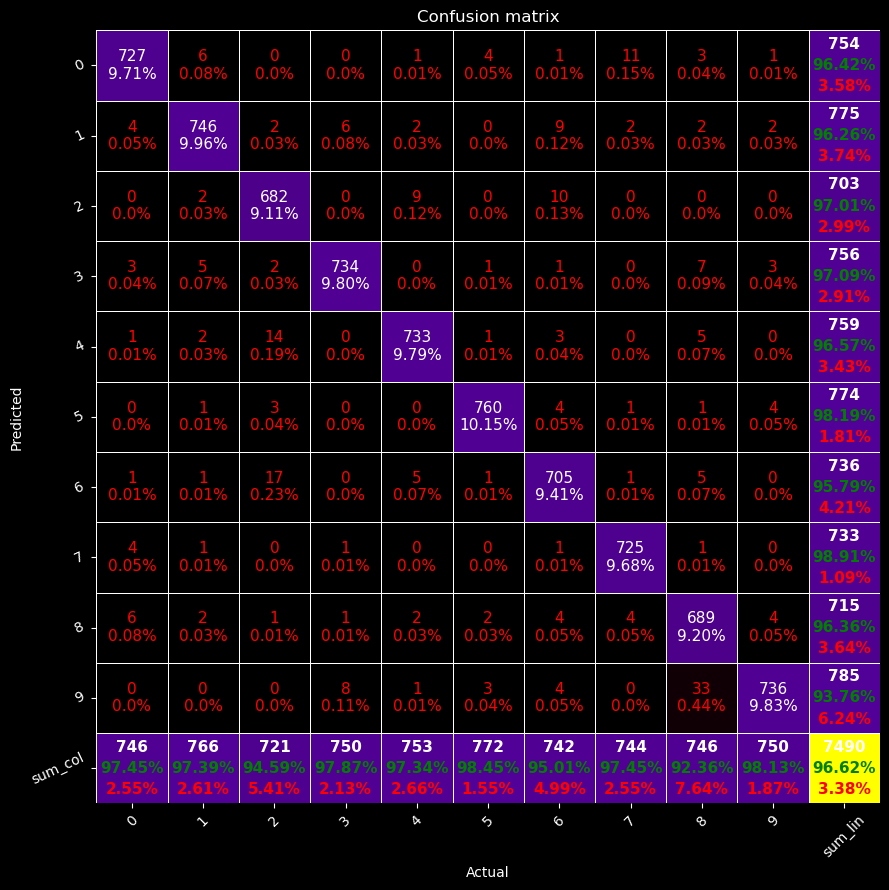

In [2]:
from pretty_confusion_matrix import pp_matrix_from_data

from models import *

mlp = MLP()
mlp.load_state_dict(torch.load('runs/mlp/model.pt'))

cnn3 = CustomCNN3()
cnn3.load_state_dict(torch.load('runs/cnn3/model.pt'))

mlp_predicted, mlp_labels = test_model(mlp, testloader)
cnn3_predicted, cnn3_labels = test_model(cnn3, testloader)

labels = [i for i in range(10)]

pp_matrix_from_data(mlp_labels, mlp_predicted, columns=labels, cmap="gnuplot")
pp_matrix_from_data(cnn3_labels, cnn3_predicted, columns=labels, cmap="gnuplot")

### **Úloha 2**

Vykonajte porovnanie priebehov trénovania, chyby a úspešpešnosti troch vybraných štruktúr 
CNN siete na trénovacích a testovacích dátach pre rozdelenie 60%/40%.

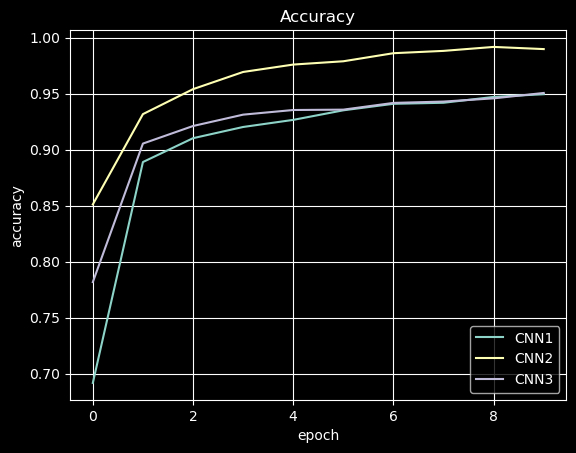

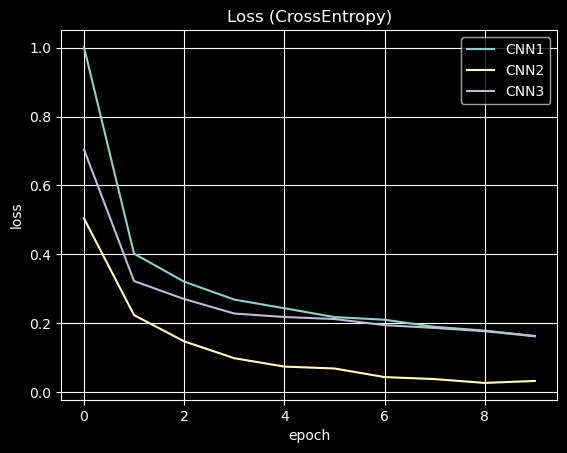

In [4]:
import pickle

cnn1 = CustomCNN()
cnn1.load_state_dict(torch.load('runs/cnn1/model.pt'))

cnn2 = CustomCNN2()
cnn2.load_state_dict(torch.load('runs/cnn2/model.pt'))

with open('runs/cnn1/train_metrics.pkl', 'rb') as f:
    cnn1_train_metrics = pickle.load(f)

with open('runs/cnn2/train_metrics.pkl', 'rb') as f:
    cnn2_train_metrics = pickle.load(f)

with open('runs/cnn3/train_metrics.pkl', 'rb') as f:
    cnn3_train_metrics = pickle.load(f)

plt.plot(cnn1_train_metrics['acc_history'], label='CNN1')
plt.plot(cnn2_train_metrics['acc_history'], label='CNN2')
plt.plot(cnn3_train_metrics['acc_history'], label='CNN3')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cnn1_train_metrics['loss_history'], label='CNN1')
plt.plot(cnn2_train_metrics['loss_history'], label='CNN2')
plt.plot(cnn3_train_metrics['loss_history'], label='CNN3')
plt.title('Loss (CrossEntropy)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

### **Úloha 3**

Najlepšie natrénovanej štruktúry CNN, zobrazte vybrané filtre v 1. a 2. konvolučnej vrstve, 
zobrazte výslednú mapu príznakov pre vybraný vstupný obraz.

### Zobrazenie filtrov

CustomCNN2(
  (conv1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=3380, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.25, inplace=False)
    (5): Linear(in_features=50, out_features=10, bias=True)
  )
)


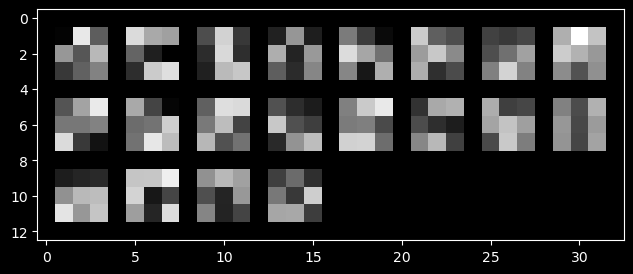

In [5]:
print(cnn2)
filter = cnn2.conv1[0].weight.data.clone().cpu()
visTensor(filter, ch=0, allkernels=False)

### Zobrazenie mapy priznakov

Predicted label: [8] | True label: 8.0


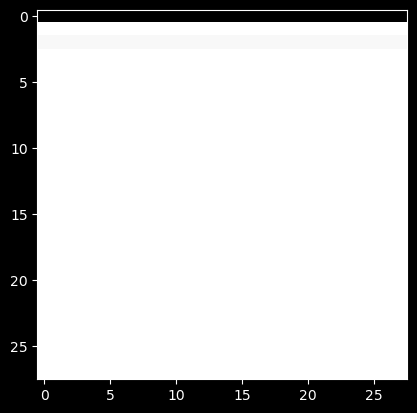

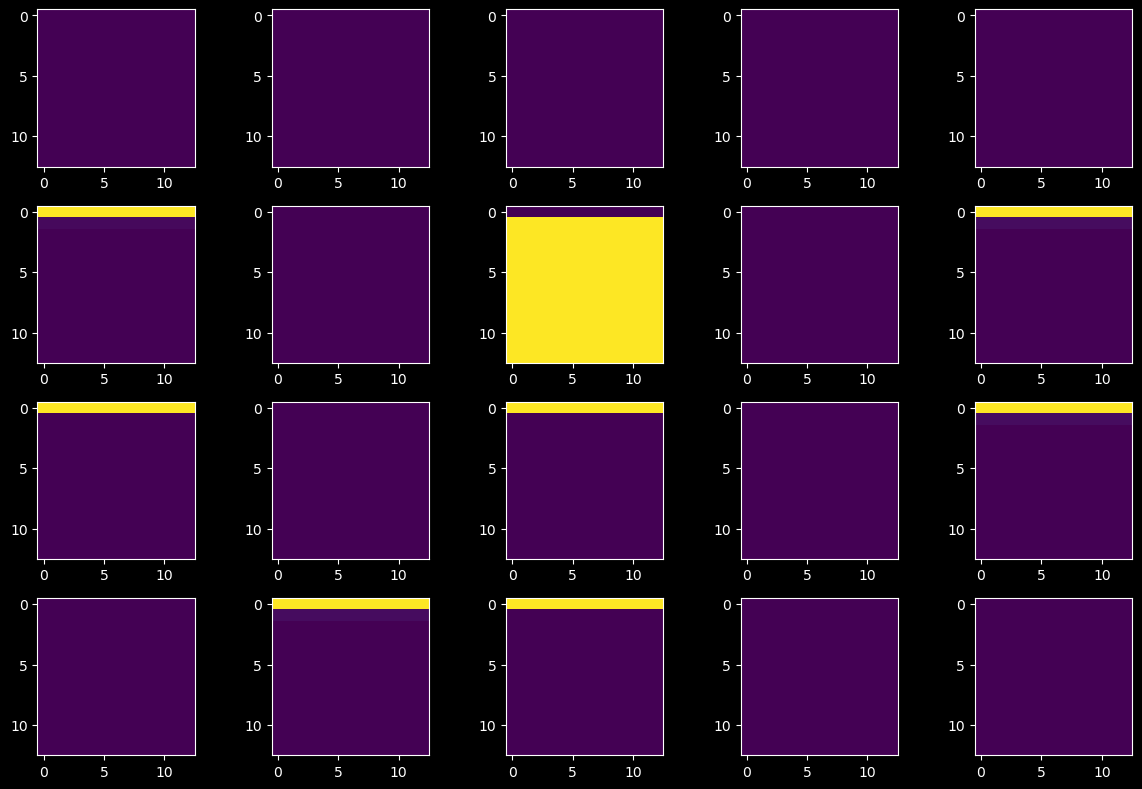

In [32]:
sel = np.random.randint(0,len(y_test))
x = x_test[sel,:,:]

plt.imshow(x, cmap='gray')

model_in = torch.tensor(x, dtype=torch.float32).view(1,1,28,28)

with torch.no_grad():
    output = cnn2(model_in)
    conv_output = cnn2.conv1(model_in)

_, predicted = torch.max(output.data, 1)


print(f"Predicted label: {predicted.cpu().numpy()} | True label: {y_test[sel]}")

fig, axes = plt.subplots(4, 5, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the subplots and plot data in each
for i, ax in enumerate(axes):
    ax.imshow(conv_output[0,i].detach().numpy(), cmap='viridis')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### **Úloha 4**

Vykonajte  porovnanie  priebehov  trénovania,  chyby  a úspešpešnosti  dvoch  trénovacích 
algoritmov SGDM, ADAM pre najlepšie štruktúru CNN siete na trénovacích a testovacích 
dátach pre rozdelenie 60%/40%.

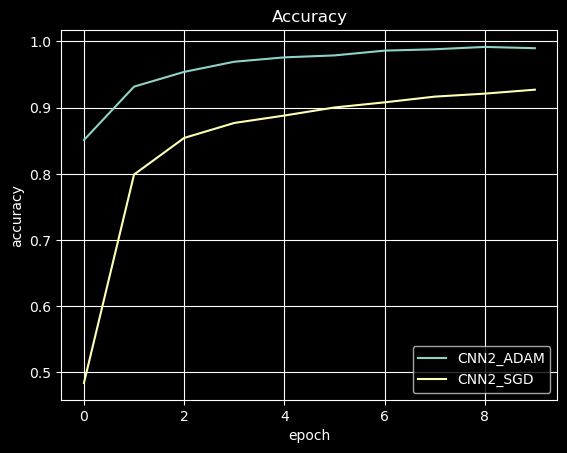

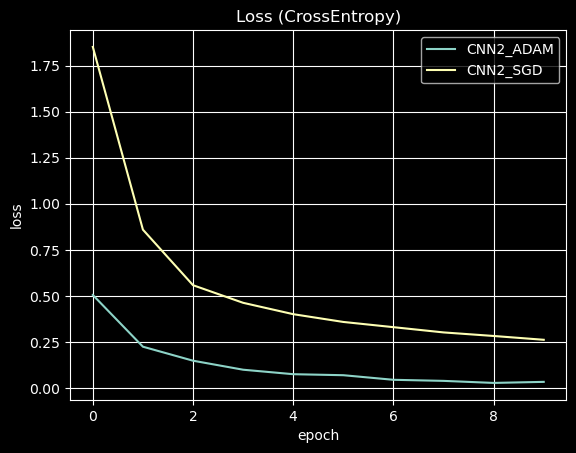

In [15]:
cnn2_sgd = CustomCNN2()
cnn2_sgd.load_state_dict(torch.load('runs/cnn2_sgdm_0.6/model.pt'))

with open('runs/cnn2_sgdm_0.6/train_metrics.pkl', 'rb') as f:
    cnn2_sgd_train_metrics = pickle.load(f)

plt.plot(cnn2_train_metrics['acc_history'], label='CNN2_ADAM')
plt.plot(cnn2_sgd_train_metrics['acc_history'], label='CNN2_SGDM')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cnn2_train_metrics['loss_history'], label='CNN2_ADAM')
plt.plot(cnn2_sgd_train_metrics['loss_history'], label='CNN2_SGDM')
plt.title('Loss (CrossEntropy)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

### **Úloha 5**

Ukážte vplyv DropOut vrstvy na úspečnosť klasifikácie na testovacích dátach pri vybranej 
štruktúre siete a SGDM trénovacom algoritme. 

Accuracy of the network on the test images: 90.71 %
Accuracy of the network on the test images: 92.46 %


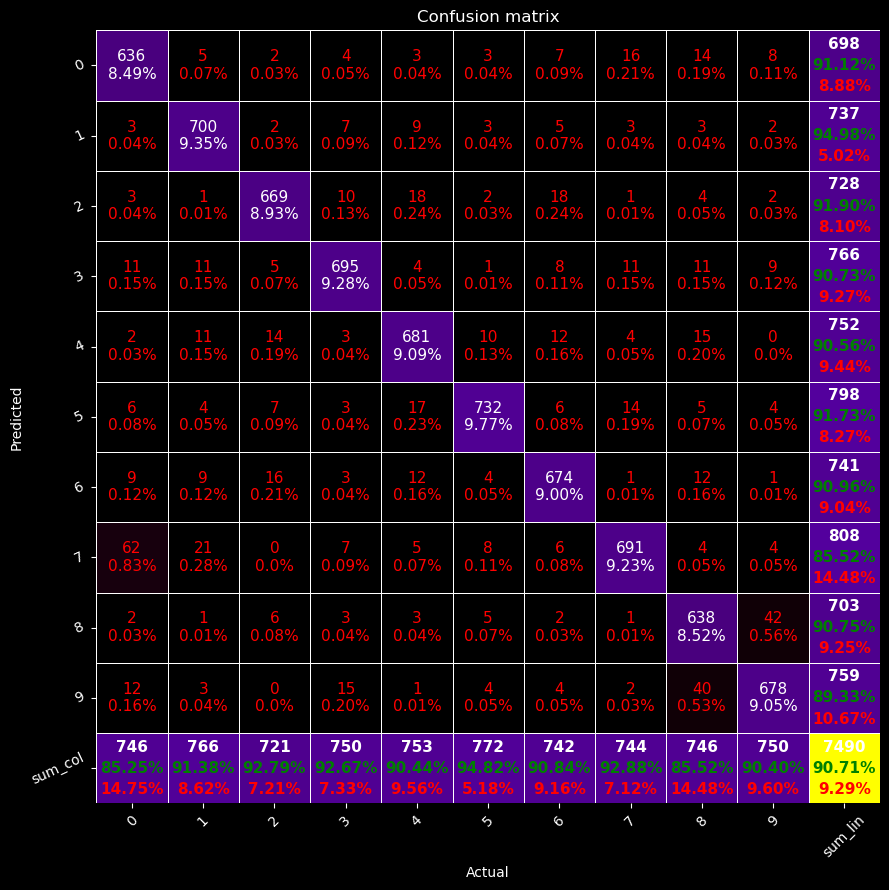

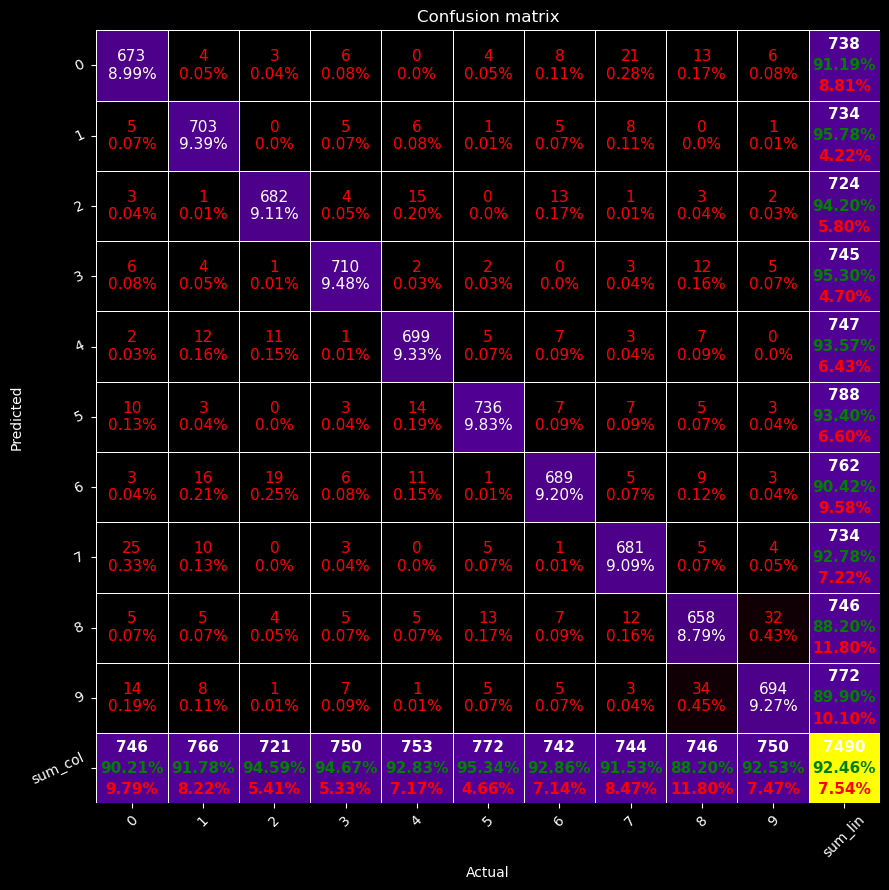

In [16]:
cnn1_sgd = CustomCNN()
cnn1_sgd.load_state_dict(torch.load('runs/cnn1_sgdm_0.8/model.pt'))

cnn1_sgd_no_drop = CustomCNN_NO_DROPOUT()
cnn1_sgd_no_drop.load_state_dict(torch.load('runs/cnn1_sgdm_no_dropout_0.8/model.pt'))

cnn1_sgd_predicted, cnn1_sgd_labels = test_model(cnn1_sgd, testloader)
cnn1_sgd_no_drop_predicted, cnn1_sgd_no_drop_labels = test_model(cnn1_sgd_no_drop, testloader)

labels = [i for i in range(10)]

pp_matrix_from_data(cnn1_sgd_labels, cnn1_sgd_predicted, columns=labels, cmap="gnuplot")
pp_matrix_from_data(cnn1_sgd_no_drop_labels, cnn1_sgd_no_drop_predicted, columns=labels, cmap="gnuplot")

### **Úloha 6**

Ukážte vplyv percentuálneho rozdelenia dát na úspešnosť CNN siete. Test vykonajte pre 
naladenú štruktúru siete a rozdelenia dát trénovacie/testovacie (60%/40%, 80%/20%)

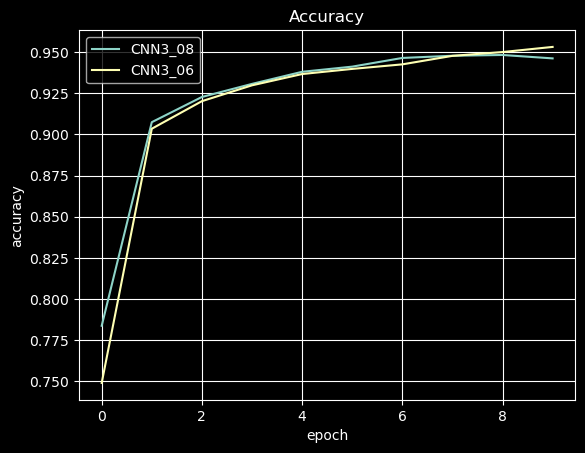

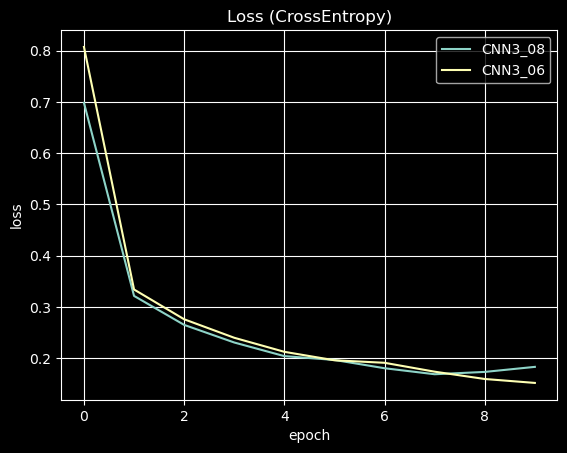

In [17]:
cnn3_06 = CustomCNN3()
cnn3_08 = CustomCNN3()

cnn3_06.load_state_dict(torch.load('runs/cnn3_0.6/model.pt'))
cnn3_08.load_state_dict(torch.load('runs/cnn3_0.8/model.pt'))

with open('runs/cnn3_0.6/train_metrics.pkl', 'rb') as f:
    cnn3_06_train_metrics = pickle.load(f)


with open('runs/cnn3_0.8/train_metrics.pkl', 'rb') as f:
    cnn3_08_train_metrics = pickle.load(f)


plt.plot(cnn3_08_train_metrics['acc_history'], label='CNN3_08')
plt.plot(cnn3_06_train_metrics['acc_history'], label='CNN3_06')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cnn3_08_train_metrics['loss_history'], label='CNN3_08')
plt.plot(cnn3_06_train_metrics['loss_history'], label='CNN3_06')
plt.title('Loss (CrossEntropy)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()
